In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

First Approximation:

1. The rocket is of a fixed mass $M$.
2. The rocket experiences constant gravity, of acceleration $g$.
3. The rocket's engine can apply a constant thrust $F_{engine}$.

In [67]:
g = 9.8 #m/sec^2
f_engine_max = 756000 # kg m/sec^2, sea level thrust
throttle = 0.60 # constant
f_engine = throttle * f_engine_max
m_rocket = 20000 #19 metric tons mass?

The rocket starts off at a height $h$ with velocity $v$ in the downward direction.
It is of mass $m$, and experiences a force of magnitude $m g$, so therefore by Newton's Second Law it accelerates
    with acceleration $g$.
Therefore, the rocket follows the following trajectory:

$$y(t) = h - v t - \frac 1 2 g t^2$$

When it hits the ground, $y(t) = 0$.  
Therefore, to find the impact time, we need to solve the quadratic equation $h - v t - \frac 1 2 g t^2 = 0$.

There are two solutions: $t_+ = - \frac v g + \sqrt{ \left( \frac v g \right)^2 + 2 \frac h g}$ 
    and $t_- = - \frac v g - \sqrt{ \left( \frac v g \right)^2 + 2 \frac h g}$.
There are two solutions because this equation allows us to see what would have happened at negative times.
We can safely discard $t_-$, because since we know that it is negative.
Therefore, the impact will occur at time $t_+$.
Below, we plot an example trajectory.

In [68]:
h = 300.0 # meters
v_initial = 40.0 # m/sec
t_max = np.sqrt((v_initial/g)**2 + 2*h/g) - (v_initial/g)

In [69]:
T = np.linspace(0, t_max, 100)
X = h - v_initial*T - 0.5*g*T**2

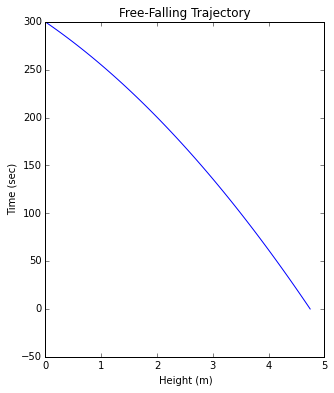

In [70]:
plt.figure(figsize=(5,6)); plt.xlabel("Height (m)"); plt.ylabel("Time (sec)"); plt.title("Free-Falling Trajectory")
plt.plot(T,X)

So that is how rockets fall, but how do they behave under thrust?
If the rocket engine is firing with thrust $F_{engine}$, then the combined acceleration of the rocket (of mass $m$)
    is $\frac {F_{engine}} m - g$.
For the engine to be effective, it needs to be thrusting with a higher force than gravity, so that the 
    acceleration is positive and downwards velocity is decreasing.

So how much altitude will a rocket engine of thrust $F$ take to stop a rocket of mass $m$, if it starts with
    initial velocity $v$ moving downwards?
If we set $y=0$ to be the position of the rocket at $t=0$, 
    and the acceleration $a$ of the rocket is $\frac {F_{engine}} m - g$, then the position as a function of time is:

$$ y(t) = - v t + \frac 1 2 a t^2 $$

and the velocity is:

$$ v(t) = - v + a t $$

We want to know what altitude ($y$) the rocket is at when its velocity is 0.
First, let's find what time $t_{stop}$ the velocity is zero at:

$\begin{align}
v(t_{stop}) & = - v + a t_{stop} \nonumber \\
0 & = - v + a t_{stop} \nonumber \\
t_{stop} & = \frac v a 
\end{align}$

Therefore, the altitude at stop is 
$\begin{align}
h_{stop} & = - v \frac v a + \frac 1 2 a \left( \frac v a \right)^2 \nonumber \\
h_{stop} & = - \frac {v^2} a + \frac 1 2 \frac {v^2} a \nonumber \\
h_{stop} & = - \frac {v^2} {2 a}
\end{align}$

Thus the distance required to stop a rocket moving with velocity $v$ is $\frac {v^2} {2 a}$.

To determine when to fire the rocket engine, we can plot the current-height and distance-to-stop curves,
    and when the current height is equal to the stopping distance, the pilot should fire the engine:

In [71]:
a = f_engine/m_rocket - g
V = v_initial + g * T
H_stop = 0.5 * V**2 / a

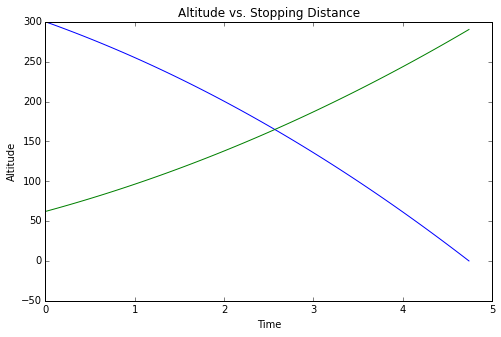

In [72]:
plt.figure(figsize=(8,5)); plt.title("Altitude vs. Stopping Distance"); plt.xlabel("Time"); plt.ylabel("Altitude")
plt.plot(T,X, label="Stopping Distance")
plt.plot(T,H_stop, label="Altitude")

The stopping altitude occurs where $h_{stop}(t) = y(t)$.

$\begin{align}
h_{stop}(t) & = y(t)\\
\frac {v(t)^2}{2 a} & = h_0 - v_0 t - \frac 1 2 g t^2 \\
\frac {(v_0 + g t)^2}{2 a} & = h_0 - v_0 t - \frac 1 2 g t^2 \\
0 & = t^2 \left[ \frac {g^2}{2 a} + \frac g 2 \right]
    + t \left[ \frac {v_0 g} {a} + v_0 \right]
    + \left[ \frac{v_0^2}{2 a} - h_0 \right]
\end{align}$.

This is a quadratic equation again, with two solutions. 
I will only show the positive one this time:

$$ t_{fire} = \sqrt{ \left( \frac {v_0} g \right)^2
        + 2 \frac{ h_0 - \frac{v_0^2}{2 a}}{g \left( \frac g a + 1 \right)}} - \frac {v_0} g $$
        
We can verify this by plotting it on the graph:

In [73]:
t_fire = np.sqrt((v_initial/g)**2 + 2*(h - (v_initial**2/(2*a)))/(g*(g/a + 1))) - (v_initial/g)
x_fire = h - v_initial * t_fire - 0.5*g*t_fire**2
v_fire = v_initial  + g * t_fire

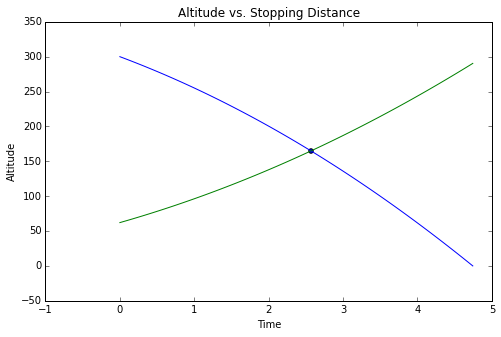

In [74]:
plt.figure(figsize=(8,5)); plt.title("Altitude vs. Stopping Distance"); plt.xlabel("Time"); plt.ylabel("Altitude")
plt.plot(T,X, label="Stopping Distance")
plt.plot(T,H_stop, label="Altitude")
plt.scatter(np.array([t_fire]),np.array([x_fire]))

We can now make an updated plot, which will show the position of the rocket when it fires its
    engines at $t_{fire}$.

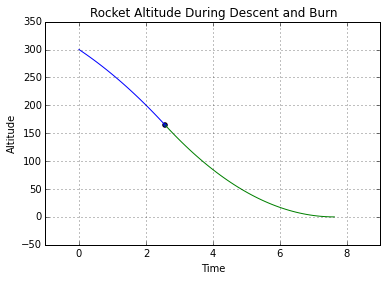

In [75]:
T_fall = np.linspace(0, t_fire)
T_burn = np.linspace(t_fire, t_fire + v_fire/a)
X_fall = h - v_initial*T_fall - 0.5*g*T_fall**2
X_burn = x_fire - v_fire*(T_burn - t_fire) + 0.5*a*(T_burn - t_fire)**2
plt.plot(T_fall, X_fall)
plt.plot(T_burn, X_burn)
plt.scatter(np.array([t_fire]),np.array([x_fire]))
plt.grid(True); plt.xlabel("Time"), plt.ylabel("Altitude"); plt.title("Rocket Altitude During Descent and Burn")

In [76]:
v_exhaust = 2.73e3 # m/sec, sea level (effective velocity)
burn_rate = throttle * f_engine / v_exhaust # kg/ sec
mass_fraction = 0.1 # 0.2 of the rocket is propellant and the remainder is structure

In [186]:
x_initial = 200000.0
v_initial = -500.0

In [187]:
T = np.linspace(0, 40)
v_without_fuel_use = v_initial + (f_engine/m_rocket - g)*T
v_with_fuel_use = v_initial + f_engine/burn_rate*np.log(m_rocket/(m_rocket - burn_rate*T)) - g*T
jerk_at_zero = f_engine*burn_rate/m_rocket**2
accel_at_zero = f_engine/m_rocket - g
v_approx = v_initial + accel_at_zero*T + 0.5*jerk_at_zero*T**2

In [188]:
v_desired = 0.0
t_stop_approx = (np.sqrt(accel_at_zero**2 + 2*jerk_at_zero*(v_desired-v_initial)) - accel_at_zero)/jerk_at_zero
# v_approx = v_initial - g*t_approx + f_engine/burn_rate*np.log(m_rocket/(m_rocket-burn_rate*t_approx))

In [189]:
t_stop = newton(lambda t: v_initial - g*t + f_engine/burn_rate*np.log(m_rocket/(m_rocket - burn_rate*t)),
      t_stop_approx,
      lambda t: f_engine/(m_rocket - burn_rate*t) - g)

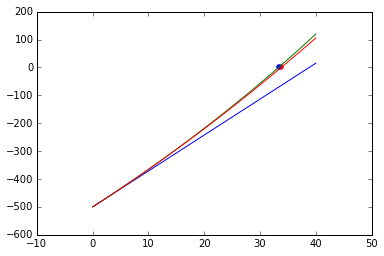

In [190]:
plt.plot(T, v_without_fuel_use)
plt.plot(T, v_with_fuel_use)
plt.plot(T, v_approx)
plt.scatter([t_stop_approx],[v_desired], color="red")
plt.scatter([t_stop],[v_desired],color="blue")

In [191]:
X_without_fuel_use = x_initial + v_initial*T + 0.5*(f_engine/m_rocket - g)*T**2
X_with_fuel_use = x_initial + v_initial*T - 0.5*g*T**2 + f_engine/burn_rate**2*((burn_rate*T - m_rocket)*np.log(m_rocket/(m_rocket-burn_rate*T)) + burn_rate*T)

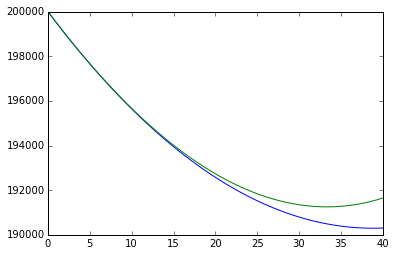

In [192]:
plt.plot(T, X_without_fuel_use)
plt.plot(T, X_with_fuel_use)

In [193]:
V_freefall = v_initial  - g * T
X_freefall = x_initial + v_initial * T - 0.5 * g * T**2

In [194]:
T_stop_approx = (np.sqrt(accel_at_zero**2 + 2*jerk_at_zero*(v_desired-V_freefall)) - accel_at_zero)/jerk_at_zero

In [195]:
def v_from_initial(v_current):
    def v(t):
        return v_current - g*t + f_engine/burn_rate*np.log(m_rocket/(m_rocket - burn_rate*t))
    return v

def a(t):
    return f_engine/(m_rocket - burn_rate*t)

T_stop = np.array([
        newton(v_from_initial(v), t, a) for t, v in zip(T_stop_approx, V_freefall)
    ])

In [196]:
T_stop

array([ 33.32774227,  33.78657047,  34.24343744,  34.69835753,
        35.15134494,  35.6024137 ,  36.05157767,  36.49885057,
        36.94424596,  37.38777723,  37.82945765,  38.26930033,
        38.70731823,  39.14352417,  39.57793082,  40.01055074,
        40.44139632,  40.87047984,  41.29781344,  41.72340911,
        42.14727875,  42.5694341 ,  42.98988679,  43.40864832,
        43.82573009,  44.24114335,  44.65489925,  45.06700882,
        45.47748298,  45.88633254,  46.29356818,  46.69920049,
        47.10323995,  47.50569692,  47.90658167,  48.30590437,
        48.70367507,  49.09990372,  49.4946002 ,  49.88777426,
        50.27943558,  50.66959371,  51.05825813,  51.44543824,
        51.83114333,  52.21538258,  52.59816513,  52.9795    ,
        53.35939613,  53.73786237])

In [197]:
D_stop = np.abs(v_initial*T_stop - 0.5*g*T_stop**2 - f_engine/burn_rate**2*((burn_rate*T_stop - m_rocket)*np.log(m_rocket/(m_rocket-burn_rate*T_stop)) + burn_rate*T_stop))

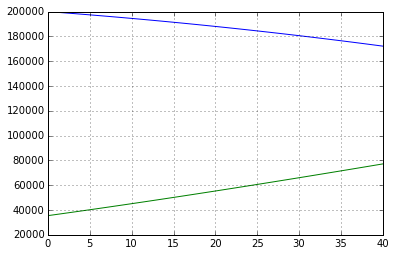

In [198]:
plt.plot(T, X_freefall)
plt.plot(T, D_stop)
plt.grid(True)

In [199]:
def x(t_fire):
    return x_initial + v_initial*t_fire - 0.5*g*t_fire**2

In [200]:
def d(t_fire):
    v = v_initial - g * t_fire
    t_stop = t_stopping_burn(t_fire)
    d_stop = np.abs(v*t_stop - 0.5*g*t_stop**2 + f_engine/burn_rate**2*(burn_rate*t_stop - (m_rocket - burn_rate*t_stop)*np.log(m_rocket/(m_rocket-burn_rate*t_stop))))
    return d_stop

In [201]:
def t_stopping_burn(t_fire):
    v = v_initial - g * t_fire
    t_stop_approx = (np.sqrt(accel_at_zero**2 + 2*jerk_at_zero*(v_desired-v)) - accel_at_zero)/jerk_at_zero
    t_stop = newton(v_from_initial(v), t_stop_approx, a)
    return t_stop

In [202]:
t_fire = newton(lambda t: x(t) - d(t), 10)

In [203]:
t_fire

115.32434930603328

In [204]:
t_stopping_burn(t_fire)

83.484961986513241

In [205]:
v= v_initial - g*t_stopping_burn(t_fire)
v

-1318.1526274678299

In [206]:
t_stop_approx = (np.sqrt(accel_at_zero**2 + 2*jerk_at_zero*(v_desired-v)) - accel_at_zero)/jerk_at_zero
t_stop = newton(v_from_initial(v), t_stop_approx, a)
t_stop

72.039657350108897

In [207]:
x(t_fire)

77169.26818696945

In [208]:
d(t_fire)

77169.268186969508

In [209]:
(m_rocket - burn_rate * t_stopping_burn(t_fire))/m_rocket

0.5838595740979956

In [210]:
T_falling = np.linspace(0, t_fire)
T_firing = np.linspace(t_fire, t_fire + t_stopping_burn(t_fire))

In [211]:
t_fire_nofuel = np.sqrt((v_initial/g)**2 + 2*(x_initial - (v_initial**2/(2*(f_engine/m_rocket - g))))/(g*(g/(f_engine/m_rocket - g) + 1))) + (v_initial/g)

In [212]:
t_fire_nofuel

106.00804701812191

In [221]:
T_falling_nofuel = np.linspace(0, t_fire_nofuel)
T_firing_nofuel = np.linspace(t_fire_nofuel, t_fire_nofuel + t_stopping_burn(t_fire_nofuel))

In [229]:
t_stopping_burn(t_fire_nofuel)

80.284121022783623

In [222]:
X_falling = x_initial + v_initial *T_falling - 0.5*g*T_falling**2

X_firing = d(t_fire) + (v_initial - g*t_fire)*(T_firing - t_fire)\
    - 0.5*g*(T_firing - t_fire)**2\
    + f_engine/burn_rate**2*(burn_rate * (T_firing - t_fire) - (m_rocket - burn_rate*(T_firing - t_fire))*np.log(m_rocket/(m_rocket-burn_rate*(T_firing - t_fire))))

In [223]:
X_falling_nofuel = x_initial + v_initial *T_falling_nofuel - 0.5*g*T_falling_nofuel**2

X_firing_nofuel = X_falling_nofuel[-1] + (v_initial - g*t_fire_nofuel)*(T_firing_nofuel - t_fire_nofuel)\
    - 0.5*g*(T_firing_nofuel - t_fire_nofuel)**2\
    + f_engine/burn_rate**2*(burn_rate * (T_firing_nofuel - t_fire_nofuel) - (m_rocket - burn_rate*(T_firing_nofuel - t_fire))*np.log(m_rocket/(m_rocket-burn_rate*(T_firing_nofuel - t_fire_nofuel))))

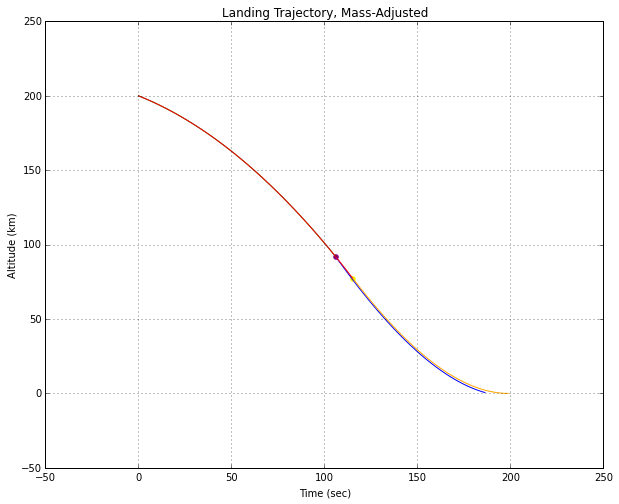

In [237]:
plt.figure(figsize=(10,8))
plt.plot(T_falling_nofuel, 1e-3*X_falling_nofuel, color="green")
plt.plot(T_firing_nofuel, 1e-3*X_firing_nofuel, color="blue")
plt.scatter([t_fire_nofuel], [1e-3*X_falling_nofuel[-1]], color="purple")
plt.plot(T_falling, 1e-3*X_falling, color="red")
plt.plot(T_firing, 1e-3*X_firing, color="orange")
plt.scatter([t_fire], [1e-3*X_falling[-1]], color="yellow")
plt.grid(True)
#plt.axis([175,200,0,1])
plt.xlabel("Time (sec)")
plt.ylabel("Altitude (km)")
plt.title("Landing Trajectory, Mass-Adjusted")